In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

%matplotlib notebook

## Deep Learning

In [1]:
import tensorflow as tf

In [8]:
fashion_nmist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_nmist.load_data()

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

<IPython.core.display.Javascript object>


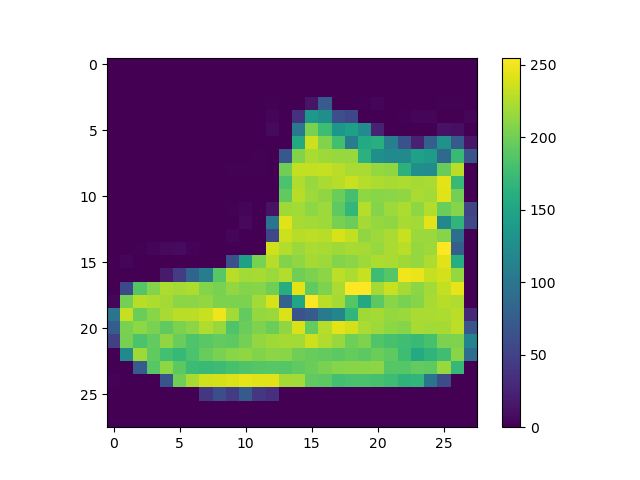

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [17]:
train_images = train_images/255.0
test_images = test_images/255.0

class_names = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

<IPython.core.display.Javascript object>


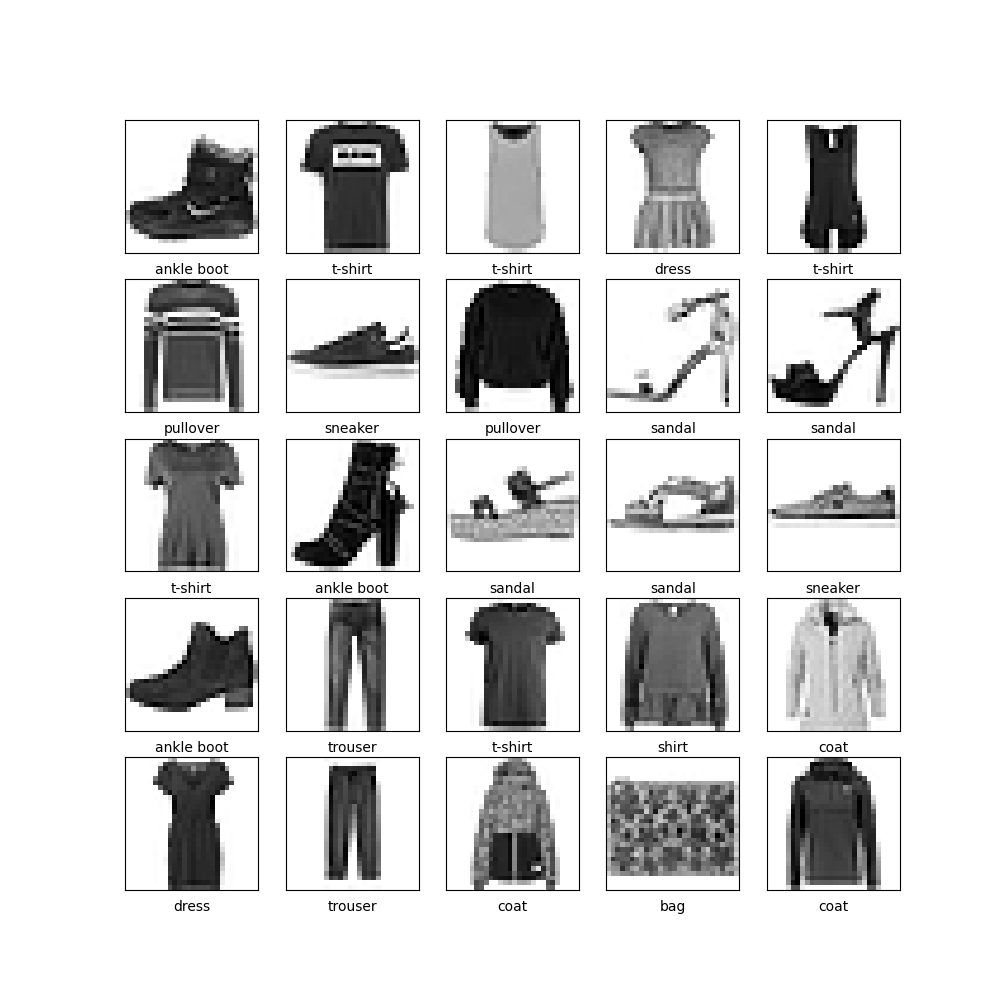

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [21]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [22]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0743 - accuracy: 0.6681
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6335 - accuracy: 0.7713
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5577 - accuracy: 0.8007
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5157 - accuracy: 0.8173
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4889 - accuracy: 0.8278
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4698 - accuracy: 0.8334
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4560 - accuracy: 0.8386
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4446 - accuracy: 0.8433
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4352 - accuracy: 0.8460
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.427

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.4585 - accuracy: 0.8353 - 432ms/epoch - 1ms/step

Test accuracy:  0.8353000283241272


In [25]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
# if you want to add more layers to previous model you defined
# just put previous "model" in Sequential with new layer within a bracket (as a list)
# here, model = tf.keras.Sequential([tf.keras.layers.1, tf.keras.layers.2, tf.keras.layers.3])
# new_model = tf.keras.Sequential([model, tf.keras.layers.4]), model includes compiled three layers

In [26]:
predictions = probability_model.predict(test_images)

predictions[0]

313/313 [==============================] - 0s 956us/step


array([4.3339830e-07, 4.2628844e-08, 3.6639181e-06, 3.4459758e-06,
       4.3320847e-06, 1.3216068e-01, 1.2397086e-05, 3.6702538e-01,
       3.4204263e-03, 4.9736923e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
prob_sum = sum(predictions[0])
prob_sum

1.000000025034641

In [32]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red' 
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                                  class_names[true_label]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [55]:
def plot_image_rand(i,j, predictions_array, true_label, img):
    true_label, img = true_label[j], img[j]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red' 
    plt.xlabel('{} [position {}]\n{:2.0f}% ({})'.format(class_names[predicted_label],
                                                     j,
                                        100*np.max(predictions_array),
                                                  class_names[true_label]),
                                        color=color)

def plot_value_array_rand(i,j, predictions_array, true_label):
    true_label = true_label[j]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

<IPython.core.display.Javascript object>


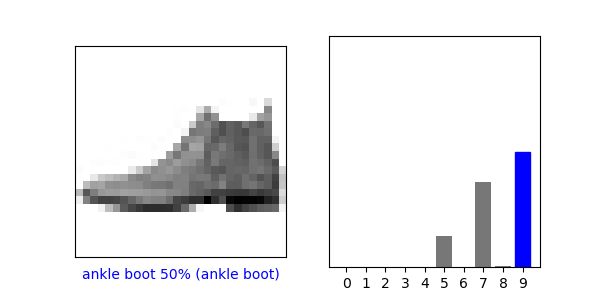

In [33]:
i = 0

plt.figure(figsize=(6,3))
plt.subplot(121)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(122)
plot_value_array(i,predictions[i],test_labels)

<IPython.core.display.Javascript object>


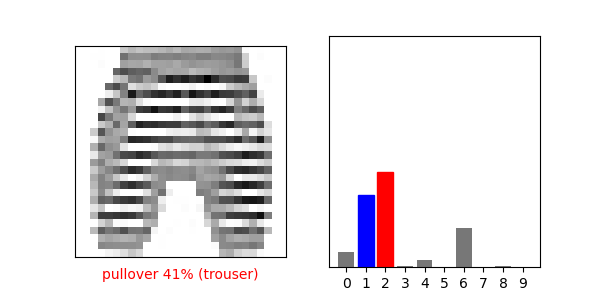

In [47]:
import random
i = random.randint(1,10000)

plt.figure(figsize=(6,3))
plt.subplot(121)
plot_image(i,predictions[i],test_labels, test_images)
plt.subplot(122)
plot_value_array(i,predictions[i],test_labels)

<IPython.core.display.Javascript object>


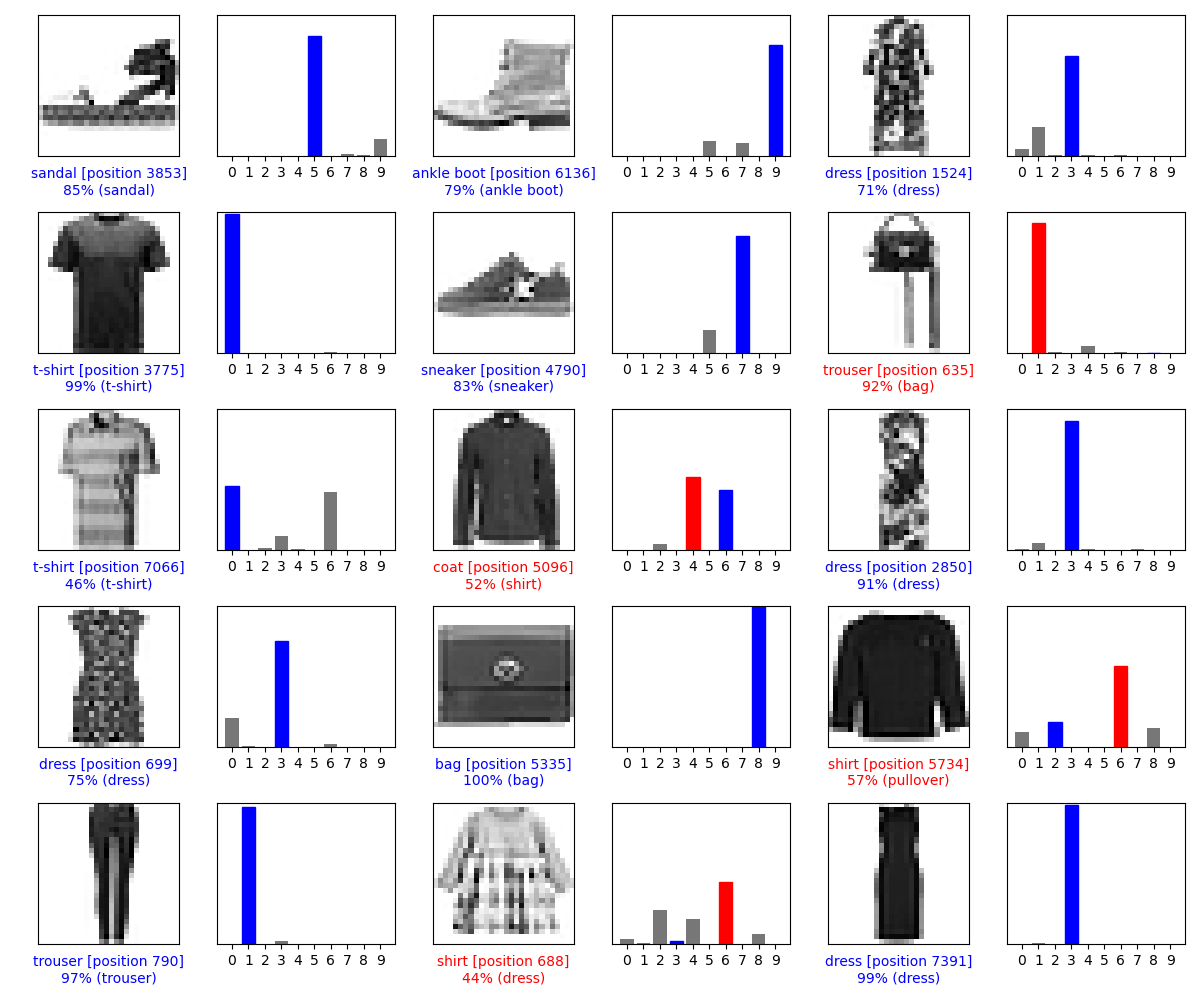

In [58]:
rows = 5
cols = 3
no_im = rows*cols

plt.figure(figsize=(4*cols,2*rows))

for i in range(no_im):
    plt.subplot(rows,2*cols,2*i+1)
    j = random.randint(1,10000)
    plot_image_rand(i,j,predictions[j],test_labels,test_images)
    plt.subplot(rows,2*cols,2*i+2)
    plot_value_array_rand(i,j,predictions[j],test_labels)
plt.tight_layout()


In [59]:
plt.gcf().savefig('E:/DS Spring 2023/DSCourse-Applied Machine Learning/Week4/Week4-3_DL2.png',dpi=300)

In [60]:
img = test_images[1]

print(img.shape)

(28, 28)


In [61]:
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)

predictions_single

1/1 [==============================] - 0s 22ms/step


array([[3.50425806e-04, 8.96234815e-06, 8.79862547e-01, 1.05849656e-04,
        1.31321745e-02, 1.64128278e-09, 1.06448472e-01, 1.62748884e-16,
        9.14613847e-05, 6.00162660e-13]], dtype=float32)

<IPython.core.display.Javascript object>


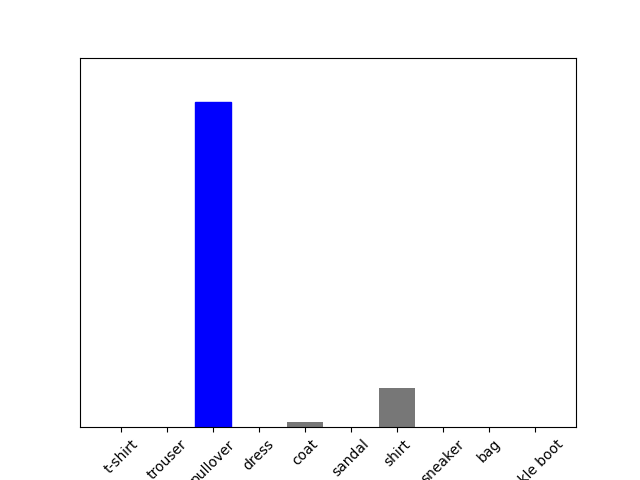

In [62]:
plt.figure()
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [63]:
np.argmax(predictions_single[0])

2

In [65]:
img = test_images[[1,2,3,4,5]]
img = (np.expand_dims(img,0))

In [68]:
predictions_multiple = probability_model.predict(img)
predictions_multiple

1/1 [==============================] - 0s 17ms/step


array([[3.50425515e-04, 8.96234087e-06, 8.79862666e-01, 1.05849467e-04,
        1.31321754e-02, 1.64128300e-09, 1.06448412e-01, 1.62748288e-16,
        9.14613047e-05, 6.00161630e-13],
       [7.20300932e-06, 9.99947906e-01, 3.31385672e-06, 2.72078923e-05,
        1.43533252e-05, 2.85453925e-13, 4.49496298e-08, 6.76726186e-09,
        2.72023870e-09, 2.30695706e-11],
       [5.19098558e-06, 9.99688864e-01, 1.09414850e-05, 2.65969633e-04,
        2.89117143e-05, 1.61015465e-10, 1.18479626e-07, 5.69381911e-08,
        7.30152871e-09, 2.32614528e-09],
       [1.45122543e-01, 1.05418009e-03, 9.84768271e-02, 2.98379287e-02,
        1.43518178e-02, 1.15593130e-05, 7.04897463e-01, 1.15381491e-08,
        6.24744594e-03, 3.11404222e-07],
       [8.88504030e-04, 9.95694876e-01, 2.45915144e-04, 9.82043683e-04,
        2.14799191e-03, 1.42090185e-11, 4.02858350e-05, 1.44526613e-08,
        2.96844348e-07, 3.28702232e-10]], dtype=float32)

In [77]:
print('test image 2: predicted - ', np.argmax(predictions_multiple[0]), 'actual - ',test_labels[1])
print('test image 3: predicted - ', np.argmax(predictions_multiple[1]), 'actual - ',test_labels[2])
print('test image 4: predicted - ', np.argmax(predictions_multiple[2]), 'actual - ',test_labels[3])
print('test image 5: predicted - ', np.argmax(predictions_multiple[3]), 'actual - ',test_labels[4])
print('test image 6: predicted - ', np.argmax(predictions_multiple[4]), 'actual - ',test_labels[5])

test image 2: predicted -  2 actual -  2
test image 3: predicted -  1 actual -  1
test image 4: predicted -  1 actual -  1
test image 5: predicted -  6 actual -  6
test image 6: predicted -  1 actual -  1
